# Dining Business Market Research in LA

## Introduction

### Goals :

This project aims to analyze market research of dining business in LA to provide data-based recommendations

### Steps :
1. Generate Information of Datasets
2. Data Preprocessing
3. Data Analyzing
4. Conclusion & Recommendation

## General Information

Import Python libraries.

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math as mt
import math
import numpy as np
import seaborn as sns
from plotly import graph_objects as go

Read the dataset.

In [49]:
try :
    df = pd.read_csv('rest_data_us.csv')

except :
    df = pd.read_csv('/datasets/rest_data_us.csv')

Checking general information of the dataset that consists of :

- object_name : name of the dining business
- chain : franchise based or not (TRUE/FALSE)
- object_type : business type
- address : address
- number : number of seats

In [50]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


(9651, 6)

In [51]:
df.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [52]:
df.describe()

,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


Findings :

There is no column name issue found in the table, but `chain` column is in incorrect data type, hence it will be fixed on the next stage. In addition, it is found that there is a big difference between mean and median of column `number`, might be caused by outlier. This issue will be fixed on the next stage, data preprocessing.

## Data Preprocessing

Checking `object_type` column to look for any mis typing.

In [53]:
df['object_type'].unique()

array(['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza'],
      dtype=object)

Checking dataset to look for any missing values.

In [54]:
df.isna().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

Checking dataset to look for any duplicated value.

In [55]:
df.duplicated().sum()

0

There are no found any issue on `object_type` column, or any duplicated value on the data. But, there are three rows contain missing values. Due to few missing values found, these three rows will be removed.

Remove missing values.

In [56]:
df = df.dropna().reset_index(drop=True)

Rechecking dataset to look for any missing values.

In [57]:
df.isna().sum()

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64

Transform data type of `chain` column to be Boolen type.

In [58]:
df['chain'] = df['chain'].astype(bool)

Checking dataset information, after fixing.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   int64 
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   bool  
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 386.4+ KB


Each column is already in correct data type, and missing values have been removed.

Checking and removing outlier by determining lower & upper whisker of column `number`.

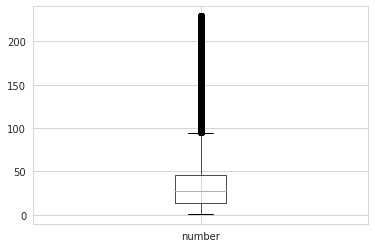

count    9648.000000
mean       43.703566
std        47.627252
min         1.000000
25%        14.000000
50%        27.000000
75%        46.000000
max       229.000000
Name: number, dtype: float64

In [60]:
Q1  = df['number'].quantile(0.25)
Q3  = df['number'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1-1.5*IQR
upper_whisker = Q3+1.5*IQR

df.boxplot(['number'])
plt.show()

df['number'].describe()

Lower Whisker : -34.0
Upper Whisker : 94.0


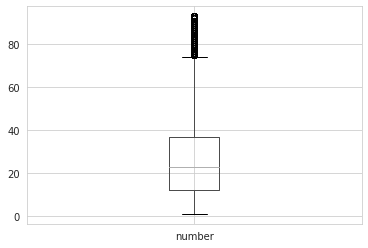

count    8221.000000
mean       26.302031
std        19.341656
min         1.000000
25%        12.000000
50%        23.000000
75%        37.000000
max        93.000000
Name: number, dtype: float64

In [61]:
df = df[(df['number'] < upper_whisker) & (df['number'] > lower_whisker)].reset_index(drop=True)

print('Lower Whisker :', lower_whisker)
print('Upper Whisker :', upper_whisker)

df.boxplot(['number'])
plt.show()

df['number'].describe()

## Data Analyzing

Checking proportion of each dining business type. 

In [62]:
object_type_counts = df['object_type'].value_counts()

fig = go.Figure(data=[go.Pie(labels=object_type_counts.index, values=object_type_counts.values)])
fig.update_layout(title='Proportion of each Dining Business Types')

fig.show()

Restaurant is the largest dining business type with 73% proportion out of total, while the bottom three are Bakery, Bar, and Pizza which are under 5% for each. 

Checking total Number of Business Types by Chain Status.

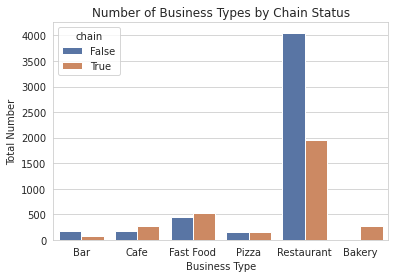

In [82]:
sns.set_style('whitegrid')
object_type_counts = df.groupby(['chain', 'object_type']).size().reset_index(name='count')

ax = sns.barplot(x='object_type', y='count', hue='chain', data=object_type_counts)

plt.title('Number of Business Types by Chain Status')

plt.xlabel('Business Type')
plt.ylabel('Total Number')
plt.show()

Findings :
1. All bakery businesses are chain business
2. There are 4000 non-chain restaurant, and half of it (around 2000) are chain restaurant.

Checking Average Number of Seats of each Bussiness Type by the Chain Status.

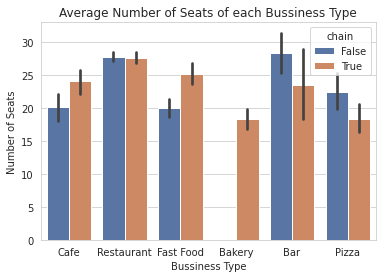

In [64]:
sns.set_style('whitegrid')
ax = sns.barplot(x='object_type', y='number', hue='chain', data=df)


plt.title('Average Number of Seats of each Bussiness Type')
plt.xlabel('Bussiness Type')
plt.ylabel('Number of Seats')

plt.show()

Findings :

1. Dining business with the largest number of seats are Bar (Non-chain only), and Restaurant
2. Dining business with the least number of seats are Bakery, and Pizza (Chain only)

Checking distribution of each business type by the chain status.

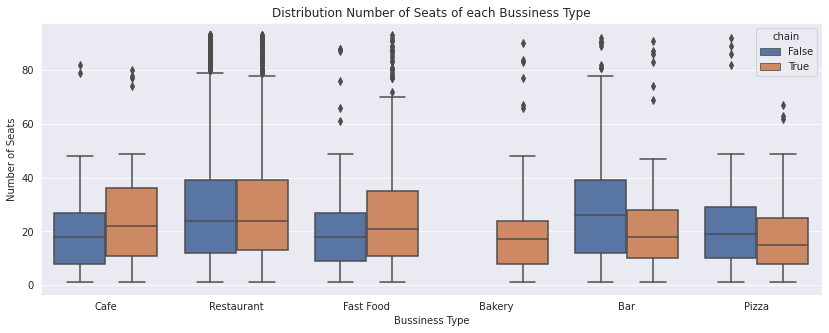

In [65]:
plt.figure(figsize=(14, 5))

sns.set_style('darkgrid')
ax = sns.boxplot(x='object_type', y='number', hue='chain', data=df)


plt.title('Distribution Number of Seats of each Bussiness Type')
plt.xlabel('Bussiness Type')
plt.ylabel('Number of Seats')

plt.show()

Findings :
1. Most of business type (Chain or Non-chain) have average number of seats between 15 to 30 seats.
2. Restaurant and Fast food (Chain) business type have some places with number of seats up to 80 seats or more.

Checking the Proportion of Chain & Non-Chain Dining Business.

In [66]:
fig = go.Figure(data=[go.Pie(labels=df['chain'].unique(), values=df['chain'].value_counts())])

fig.update_layout(title='Proportion of Chain & Non-Chain Dining Business')

fig.show()

Non-chain dining business has higher proportion than the chain one, with 60.7% proportion out of total.

Checking number of seats distribution of Chain & Non-Chain Dining Business.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



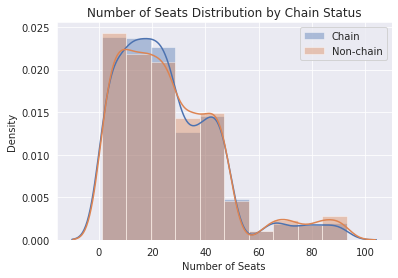

Chain :  count    3227.000000
mean       25.644562
std        18.691754
min         1.000000
25%        12.000000
50%        22.000000
75%        37.000000
max        93.000000
Name: number, dtype: float64

Non-chain :  count    4994.000000
mean       26.726872
std        19.740442
min         1.000000
25%        12.000000
50%        23.000000
75%        38.000000
max        93.000000
Name: number, dtype: float64


In [67]:
chain = df[df['chain'] == True]
non_chain = df[df['chain'] == False]

sns.distplot(chain['number'], bins=10, label='Chain')
sns.distplot(non_chain['number'], bins=10, label='Non-chain')

plt.title('Number of Seats Distribution by Chain Status')

plt.xlabel('Number of Seats')
plt.ylabel('Density')

plt.legend()

plt.show()

print('Chain : ',chain['number'].describe())
print()
print('Non-chain : ',non_chain['number'].describe())

Findings :

1. All business type have approximately similar proportion for each chain and non-chain dining business, except : restaurant that the total of chain business is only half of the total of non-chain one; and bakery that only have chain business type

2. Based on the business type : fast food and cafe with chain business type have more number of seats compare to non-chain business; while bar and pizza with chain business type have less number of seats compare to non-chain business; and restaurant with chain business type has slightly less number of seats compare to non-chain one. 

Checking Average Number of Seats of each Bussiness Type.

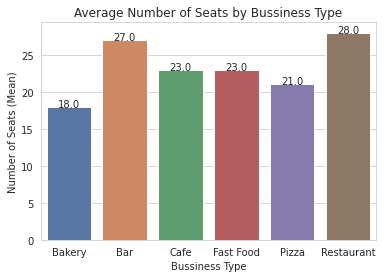

In [81]:
sns.set_palette('deep')

temp = df.groupby('object_type')['number'].mean().reset_index()
temp = temp.round(0)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

ax = sns.barplot(x='object_type', y='number', data=temp)

addlabels(temp['object_type'], temp['number'])

plt.title('Average Number of Seats by Bussiness Type')
plt.xlabel('Bussiness Type')
plt.ylabel('Number of Seats (Mean)')

plt.show()

Restaurant and Bar have the highest Average Number of Seats that reach above 28 seats of each, and Bakery is the least position with under 20 seats approximately. 

Checking Top 10 Dining Business Locations.

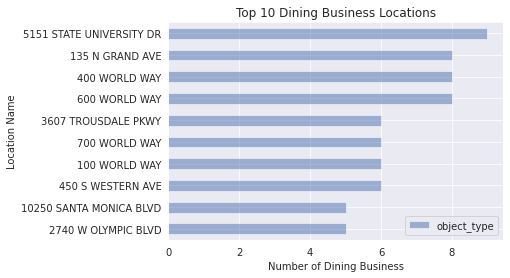

In [22]:
top_location = df.groupby('address')['object_type'].count().sort_values(ascending=False)[:10].reset_index()

ax = top_location.plot(kind='barh', alpha=0.5, x='address')

plt.title('Top 10 Dining Business Locations')
plt.xlabel('Number of Dining Business')
plt.ylabel('Location Name')

ax.invert_yaxis()

plt.show()

The location with the most dining business has nine dining businesses, and there are the other 3 locations with eight dining businesses of each. 

Checking location that only have one dining business.

In [23]:
least_loc = df.groupby('address')['object_type'].count().sort_values(ascending=True).reset_index()
least_loc[least_loc['object_type'] == 1].count()

address        6562
object_type    6562
dtype: int64

In [24]:
least_loc.head()

,address,object_type
0,00936 S MAPLE AVE 17,1
1,4632 SANTA MONICA BLVD STE 25,1
2,4632 SANTA MONICA BLVD # 25,1
3,4632 SANTA MONICA BLVD # 1617,1
4,4632 SANTA MONICA BLVD # 16-17,1


It is found that there are 6562 locations with only one dining business.

Checking Number of Seats Distribution for Selected Addresses with the most dining business.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



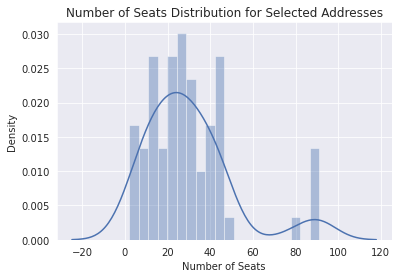

count    67.000000
mean     29.805970
std      20.752684
min       2.000000
25%      15.500000
50%      27.000000
75%      39.500000
max      91.000000
Name: number, dtype: float64

In [25]:
filtered_df = df[df['address'].isin(top_location['address'])]

sns.distplot(filtered_df['number'], bins=20)

plt.title('Number of Seats Distribution for Selected Addresses')

plt.xlabel('Number of Seats')
plt.ylabel('Density')

plt.show()

filtered_df['number'].describe()

In the selected addresses with the most dining businesses, number of seats are mostly around 27 seats.

## Conclusion

Data Analyzing Result :

- Restaurant is the largest dining business type with 73% proportion out of total, while the bottom three are Bakery, Bar, and Pizza which are under 5% for each. 
- There are 4000 non-chain restaurant, and half of it (around 2000) are chain restaurant.
- Dining business with the largest number of seats are Bar (Non-chain only), and Restaurant
- Based on the business type : fast food and cafe with chain business type have more number of seats compare to non-chain business; while bar and pizza with chain business type have less number of seats compare to non-chain business; and restaurant with chain business type has slightly less number of seats compare to non-chain one. 
- Restaurant and Bar have the highest Average Number of Seats that reach above 25 seats of each, and Bakery is in the least position with under 20 seats approximately.
- In the selected addresses with the most dining businesses, number of seats are mostly around 27 seats.

Based on the presented results, here are the recommendations:

1. Focusing on the Restaurant category is recommended, as it constitutes the largest proportion (73%) of the total dining businesses.
2. The other options would be fast food and cafe options, which seem to have a strong presence in the market.
3. Businesses should aim to have an average seating capacity of around 25 seats, as both Restaurant and Bar categories show the highest average number of seats in this range.
4. The data indicates that around half of the non-chain restaurants (approximately 2000 out of 4000) are chain restaurants. This suggests that there is a significant market for franchise-based dining businesses.
5. To expand franchising might consider focusing on business types that have shown success as chains. These include fast food and cafe establishments.

Presentasi: <https://drive.google.com/file/d/1o8vA3DgfUBGVADG9NoAKgW78XyUBdbra/view?usp=sharing>